In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import stft as STFT
from smstools.models import utilFunctions as UF
from smstools.transformations import stftTransformations as STFTT

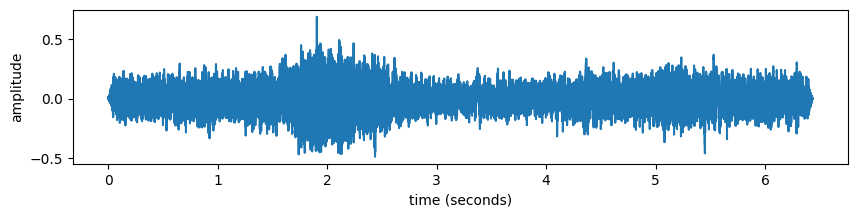

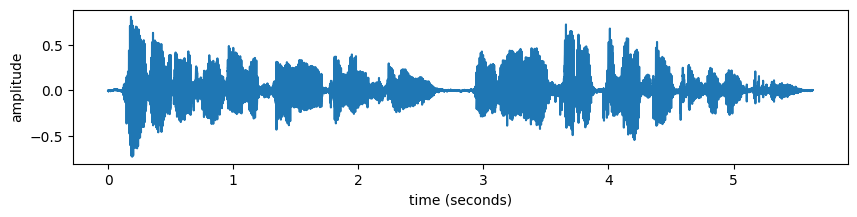

In [2]:
inputFile1 = "../sounds/ocean.wav"
fs, x1 = UF.wavread(inputFile1)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x1.size/fs, x1.size)
plt.plot(time_indexes, x1)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x1, rate=fs))

inputFile2 = "../sounds/speech-male.wav"
fs, x2 = UF.wavread(inputFile2)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x2.size/fs, x2.size)
plt.plot(time_indexes, x2)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x2, rate=fs))

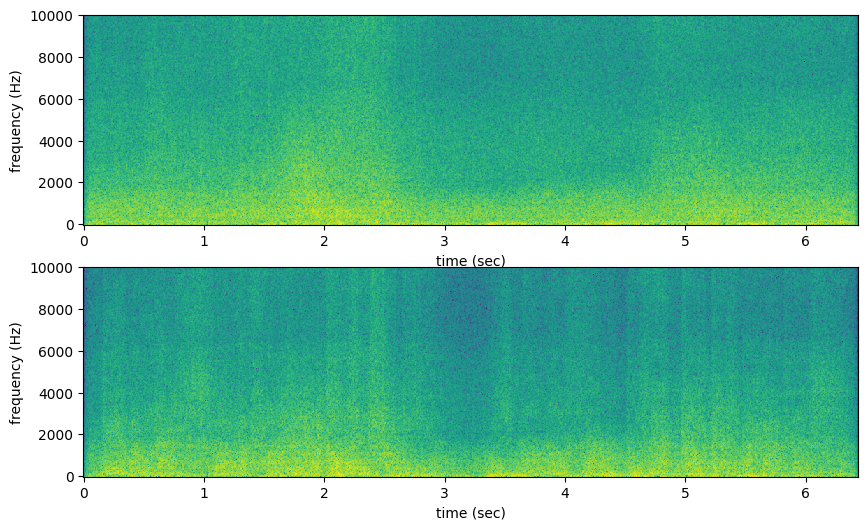

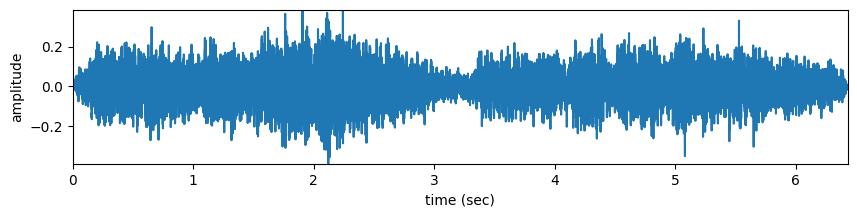

In [3]:
window1="hamming"
window2="hamming"
M1=1024
M2=1024
N1=1024
N2=1024
H1=256
smoothf=0.5
balancef=0.2

 # compute analysis windows
w1 = get_window(window1, M1)
w2 = get_window(window2, M2)

# perform morphing
y = STFTT.stftMorph(x1, x2, fs, w1, N1, w2, N2, H1, smoothf, balancef)
# compute the magnitude and phase spectrogram of input sound (for plotting)
mX1, pX1 = STFT.stftAnal(x1, w1, N1, H1)
# compute the magnitude and phase spectrogram of output sound (for plotting)
mY, pY = STFT.stftAnal(y, w1, N1, H1)

# create figure to plot
plt.figure(figsize=(10, 6))
# frequency range to plot
maxplotfreq = 10000.0

# plot magnitude spectrogram of sound 1
plt.subplot(2, 1, 1)
numFrames = int(mX1[:, 0].size)
frmTime = H1 * np.arange(numFrames) / float(fs)
binFreq = fs * np.arange(N1 * maxplotfreq / fs) / N1
plt.pcolormesh(frmTime, binFreq, np.transpose(mX1[:, : int(N1 * maxplotfreq / fs) + 1]))
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")

# plot magnitude spectrogram of morphed sound
plt.subplot(2, 1, 2)
numFrames = int(mY[:, 0].size)
frmTime = H1 * np.arange(numFrames) / float(fs)
binFreq = fs * np.arange(N1 * maxplotfreq / fs) / N1
plt.pcolormesh(frmTime, binFreq, np.transpose(mY[:, : int(N1 * maxplotfreq / fs) + 1]))
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()

# plot the morphed sound
plt.figure(figsize=(10, 2))
plt.plot(np.arange(y.size) / float(fs), y)
plt.axis([0, y.size / float(fs), min(y), max(y)])
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))
